# Análisis de los datos obtenidos 

Uso de ipython para el análsis y muestra de los datos obtenidos durante la producción.Se implementa un regulador experto. Los datos analizados son del día 11 de Agosto del 2015

In [1]:
#Importamos las librerías utilizadas
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
#Mostramos las versiones usadas de cada librerías
print ("Numpy v{}".format(np.__version__))
print ("Pandas v{}".format(pd.__version__))
print ("Seaborn v{}".format(sns.__version__))

Numpy v1.9.2
Pandas v0.16.2
Seaborn v0.6.0


In [3]:
#Abrimos el fichero csv con los datos de la muestra
datos = pd.read_csv('841512.CSV')

In [4]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [5]:
#Mostramos un resumen de los datos obtenidoss
datos.describe()
#datos.describe().loc['mean',['Diametro X [mm]', 'Diametro Y [mm]']]

,Tmp Husillo,Tmp Nozzle,Diametro X,Diametro Y,MARCHA,PARO,RPM EXTR,RPM TRAC
count,2819.000000,2819.000000,2819.000000,2819.000000,2819,2819,2819.000000,2819.000000
mean,58.516602,131.705534,1.468372,1.100644,1,0.3944661,1.660163,2.996379
std,9.536650,21.267615,0.545053,0.727923,0,0.4888224,0.677227,0.834694
min,30.700000,31.300000,0.014000,0.000342,True,False,0.000000,0.000000
25%,57.600000,137.200000,1.264217,0.000342,1,0,2.000000,2.219072
50%,63.000000,138.000000,1.585374,1.459957,1,0,2.000000,3.219072
75%,64.400000,138.600000,1.757422,1.678324,1,1,2.000000,3.219072
max,65.200000,140.200000,3.776121,2.413878,True,True,2.000000,5.899920


In [6]:
#Almacenamos en una lista las columnas del fichero con las que vamos a trabajar
columns = ['Diametro X', 'Diametro Y', 'RPM TRAC']

array([<matplotlib.axes._subplots.AxesSubplot object at 0x082580D0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x082A7D90>], dtype=object)

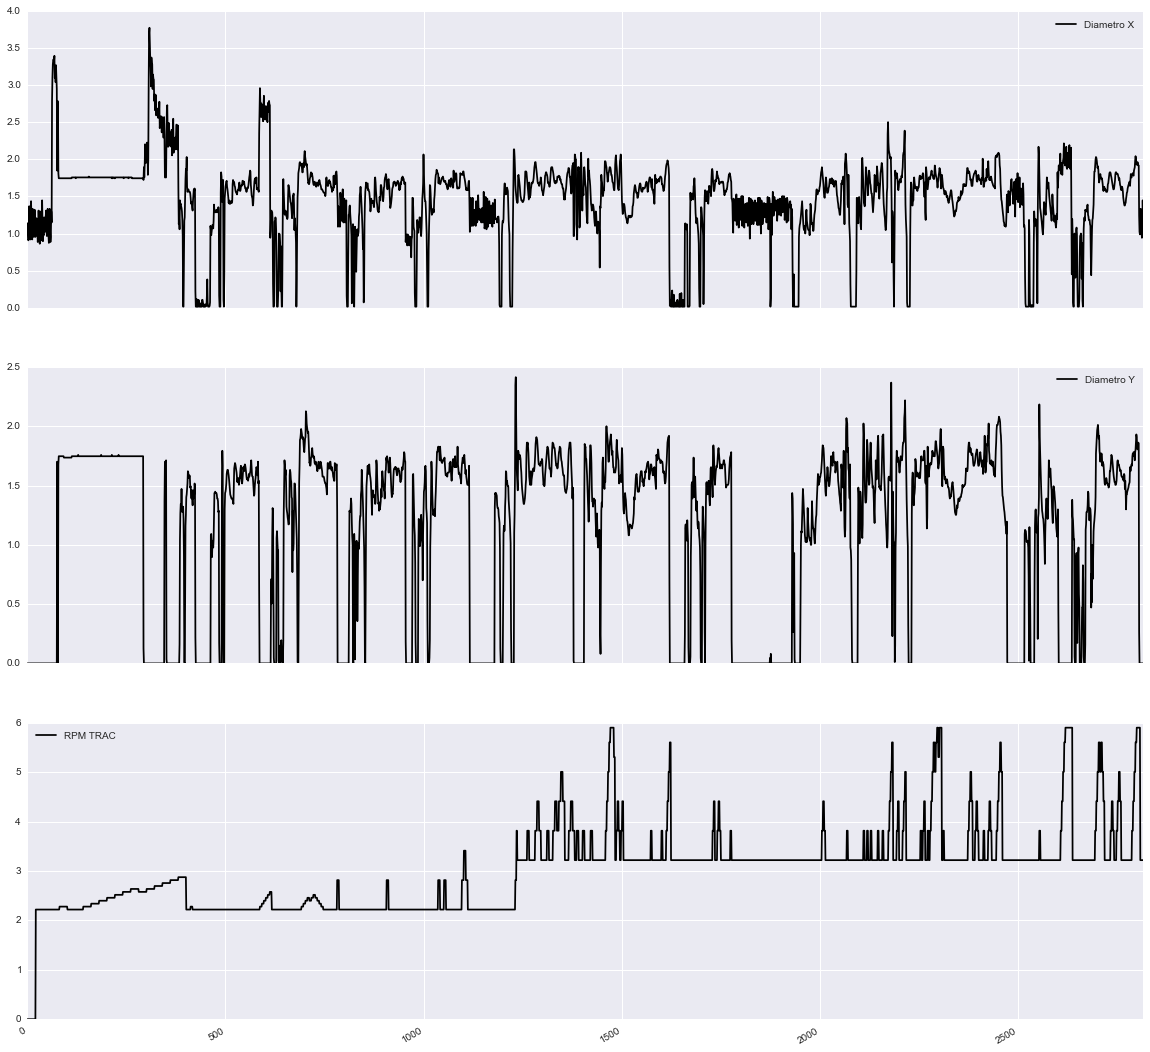

In [7]:
#Mostramos en varias gráficas la información obtenida tras el ensayo
datos[columns].plot(subplots=True, figsize=(20,20))

Representamos ambos diámetros en la misma gráfica

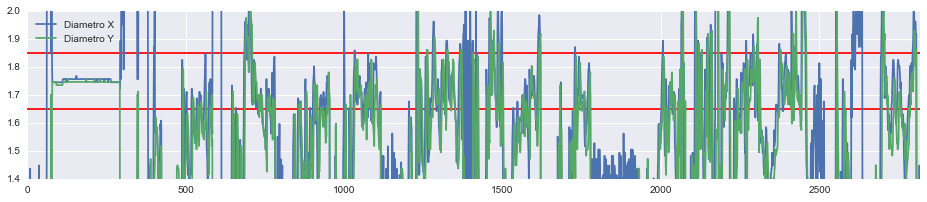

In [8]:
datos.ix[:, "Diametro X":"Diametro Y"].plot(figsize=(16,3),ylim=(1.4,2)).hlines([1.85,1.65],0,3500,colors='r')

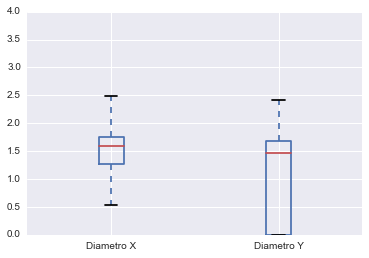

In [9]:
datos.ix[:, "Diametro X":"Diametro Y"].boxplot(return_type='axes')

Mostramos la representación gráfica de la media de las muestras

array([<matplotlib.axes._subplots.AxesSubplot object at 0x08430AB0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x08A46850>], dtype=object)

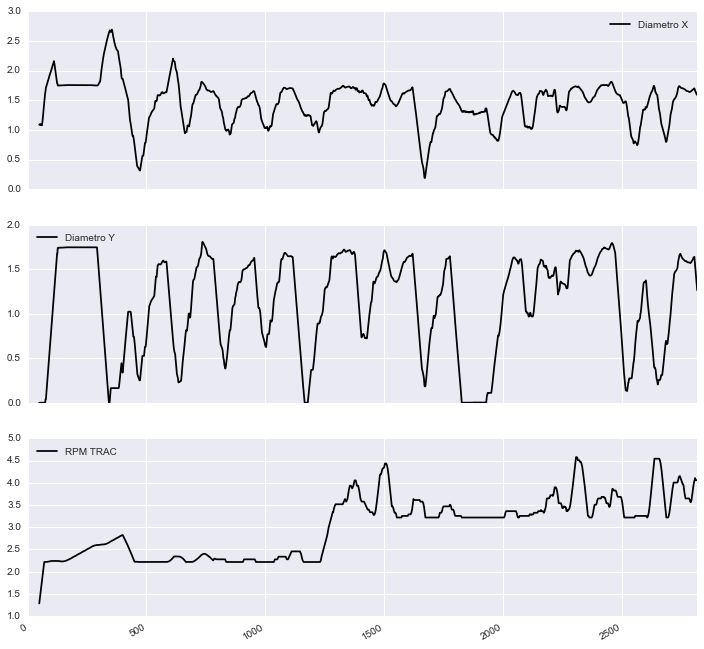

In [10]:
pd.rolling_mean(datos[columns], 50).plot(subplots=True, figsize=(12,12))

Comparativa de Diametro X frente a Diametro Y para ver el ratio del filamento

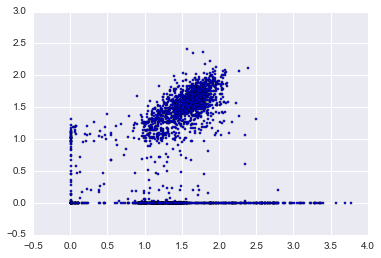

In [11]:
plt.scatter(x=datos['Diametro X'], y=datos['Diametro Y'], marker='.')

#Filtrado de datos
Las muestras tomadas $d_x >= 0.9$ or $d_y >= 0.9$ las asumimos como error del sensor, por ello las filtramos de las muestras tomadas.

In [12]:
datos_filtrados = datos[(datos['Diametro X'] >= 0.9) & (datos['Diametro Y'] >= 0.9)]

##Representación de X/Y

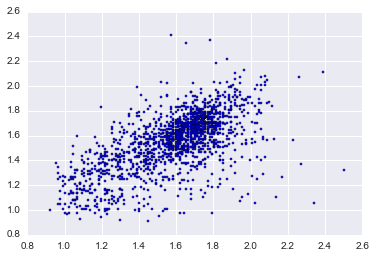

In [13]:
plt.scatter(x=datos_filtrados['Diametro X'], y=datos_filtrados['Diametro Y'], marker='.')

#Analizamos datos del ratio

In [14]:
ratio = datos_filtrados['Diametro X']/datos_filtrados['Diametro Y']
ratio.describe()

count    1897.000000
mean        1.028405
std         0.139681
min         0.652023
25%         0.963465
50%         1.005803
75%         1.070952
max         2.214601
dtype: float64

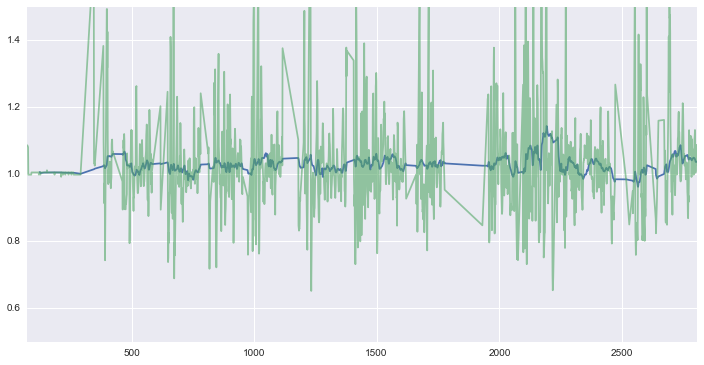

In [15]:
rolling_mean = pd.rolling_mean(ratio, 50)
rolling_std = pd.rolling_std(ratio, 50)
rolling_mean.plot(figsize=(12,6))
# plt.fill_between(ratio, y1=rolling_mean+rolling_std, y2=rolling_mean-rolling_std, alpha=0.5)
ratio.plot(figsize=(12,6), alpha=0.6, ylim=(0.5,1.5))

#Límites de calidad

Calculamos el número de veces que traspasamos unos límites de calidad. 
$Th^+ = 1.85$ and $Th^- = 1.65$ 

In [16]:
Th_u = 1.85
Th_d = 1.65

In [17]:
data_violations = datos[(datos['Diametro X'] > Th_u) | (datos['Diametro X'] < Th_d) |
                       (datos['Diametro Y'] > Th_u) | (datos['Diametro Y'] < Th_d)]

In [18]:
data_violations.describe()

,Tmp Husillo,Tmp Nozzle,Diametro X,Diametro Y,MARCHA,PARO,RPM EXTR,RPM TRAC
count,2263.000000,2263.000000,2263.000000,2263.000000,2263,2263,2263.000000,2263.000000
mean,60.068758,134.496818,1.400948,0.945249,1,0.3539549,1.771100,2.977024
std,7.446700,18.607393,0.588722,0.732944,0,0.4783011,0.526667,0.811737
min,30.700000,31.300000,0.014000,0.000342,True,False,0.000000,0.000000
25%,59.300000,137.500000,1.183928,0.000342,1,0,2.000000,2.219072
50%,63.300000,138.000000,1.482145,1.276068,1,0,2.000000,3.219072
75%,64.400000,138.600000,1.688603,1.563394,1,1,2.000000,3.219072
max,65.200000,140.200000,3.776121,2.413878,True,True,2.000000,5.899920


array([<matplotlib.axes._subplots.AxesSubplot object at 0x092D1730>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x095E8390>], dtype=object)

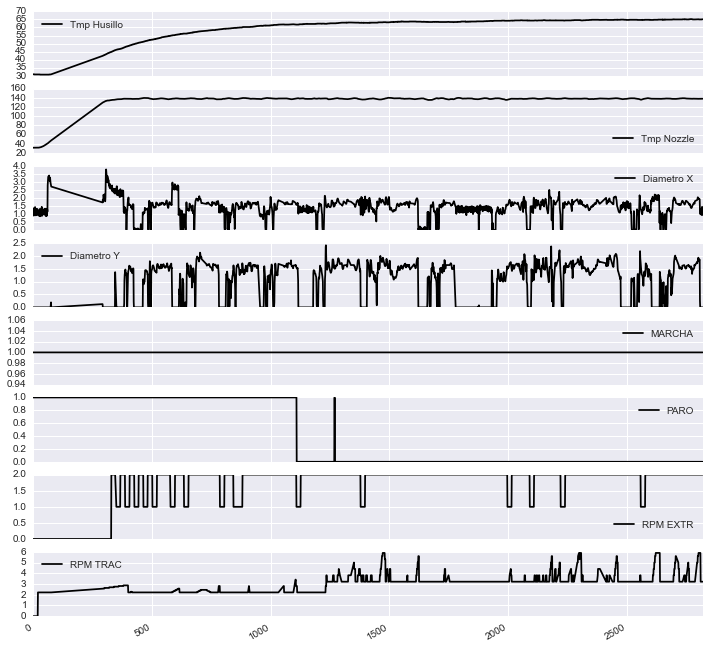

In [19]:
data_violations.plot(subplots=True, figsize=(12,12))